🧪 Science project inspired by: <a href="https://www.sciencebuddies.org/science-fair-projects/project-ideas/Astro_p017/astronomy/sunspot-cycles">Link</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing data
# https://www.swpc.noOnset.gov/products/solar-cycle-progression
ssn_data = pd.read_csv(
    'data/observed-solar-cycle-indices.csv', 
    index_col='time-tag', 
    parse_dates=True,
)

# Cleaning data
ssn_data.dropna(axis=0, how='any', inplace=True)
ssn_data.drop(['Unnamed: 0'], axis=1, inplace=True)
ssn_data.head()

,ssn,smoothed_ssn,observed_swpc_ssn,smoothed_swpc_ssn,f10.7,smoothed_f10.7
time-tag,,,,,,
1749-01-01,96.7,-1.0,-1.0,-1.0,-1.0,-1.0
1749-02-01,104.3,-1.0,-1.0,-1.0,-1.0,-1.0
1749-03-01,116.7,-1.0,-1.0,-1.0,-1.0,-1.0
1749-04-01,92.8,-1.0,-1.0,-1.0,-1.0,-1.0
1749-05-01,141.7,-1.0,-1.0,-1.0,-1.0,-1.0


In [3]:
# Importing data
# https://en.wikipedia.org/wiki/List_of_solar_cycles
SolarCycles1to24 = pd.read_csv(
    'data/SolarCyclesList.csv', 
    index_col='Solar Cycle', 
    parse_dates=True,
)

# Cleaning existing columns
SolarCycles1to24['Start'] = (SolarCycles1to24['Start']+"-01").replace(" ", "")
SolarCycles1to24['Max'] = (SolarCycles1to24['Max']+"-01").replace(" ", "")

# Creating new columns
SolarCycles1to24['Onset time (Years)'] = ((pd.to_datetime(SolarCycles1to24['Max']) - pd.to_datetime(SolarCycles1to24['Start'])).dt.days) / 365
SolarCycles1to24['End'] = SolarCycles1to24['Start'].shift(-1) # creating a 'Cycle end' column
SolarCycles1to24['End'].iloc[-1] = '2019-12-01' # Inserting date of start of current solar cycle
SolarCycles1to24['Decay time (Years)'] = ((pd.to_datetime(SolarCycles1to24['End']) - pd.to_datetime(SolarCycles1to24['Max'])).dt.days) / 365
SolarCycles1to24['Cycle length (Years)'] = ((pd.to_datetime(SolarCycles1to24['End']) - pd.to_datetime(SolarCycles1to24['Start'])).dt.days) / 365

# Expect that decay time is longer. Therefore decay - onset. If value is negative onset time is longer.
SolarCycles1to24['Onset-Decay Difference (Years)'] =  SolarCycles1to24['Decay time (Years)'] - SolarCycles1to24['Onset time (Years)']

# Display data
SolarCycles1to24.tail()

,Start,Min SSN (start of cycle),Max,Max SSN,Ave spots per day,Time of Rise (YY-mm),Length (YY-mm),Onset time (Years),End,Decay time (Years),Cycle length (Years),Onset-Decay Difference (Years)
Solar Cycle,,,,,,,,,,,,
Solar cycle 20,1964-10-01,14.3,1968-11-01,157,86,24-01,24-05,4.087671,1976-03-01,7.334247,11.421918,3.246575
Solar cycle 21,1976-03-01,17.8,1979-12-01,233,111,24-09,24-06,3.753425,1986-09-01,6.756164,10.509589,3.002740
Solar cycle 22,1986-09-01,13.5,1989-11-01,213,106,24-02,24-11,3.169863,1996-08-01,6.753425,9.923288,3.583562
Solar cycle 23,1996-08-01,11.2,2001-11-01,180,82,24-03,24-04,5.254795,2008-12-01,7.087671,12.342466,1.832877
Solar cycle 24,2008-12-01,2.2,2014-04-01,116,49,24-04,11-00,5.334247,2019-12-01,5.671233,11.005479,0.336986


In [4]:
longer_onset = SolarCycles1to24[(SolarCycles1to24['Onset-Decay Difference (Years)'] < 0)]
longer_onset

,Start,Min SSN (start of cycle),Max,Max SSN,Ave spots per day,Time of Rise (YY-mm),Length (YY-mm),Onset time (Years),End,Decay time (Years),Cycle length (Years),Onset-Decay Difference (Years)
Solar Cycle,,,,,,,,,,,,
Solar cycle 1,1755-02-01,14.0,1761-06-01,144,-70,24-04,24-04,6.334247,1766-06-01,5.002740,11.336986,-1.331507
Solar cycle 5,1798-04-01,5.3,1805-02-01,82,-38,24-10,24-03,6.841096,1810-07-01,5.413699,12.254795,-1.427397
Solar cycle 7,1823-05-01,0.1,1829-11-01,119,-63,24-06,24-06,6.509589,1833-11-01,4.002740,10.512329,-2.506849


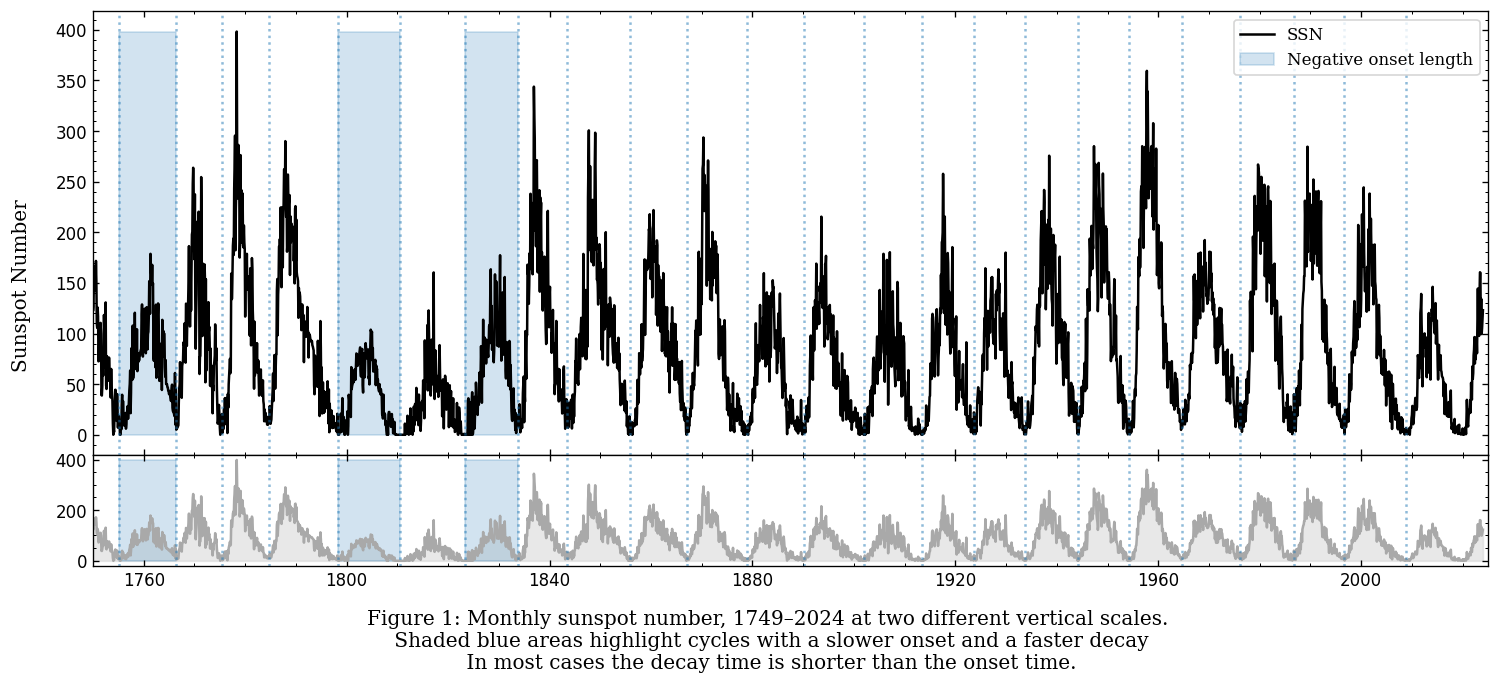

In [5]:
fig, (a0, a1) = plt.subplots(
    2, 1, 
    figsize=(15, 6), 
    gridspec_kw={'height_ratios': [2, 0.5]}, 
    sharex=True,
    dpi=120
)

# Plotting data
a0.plot(ssn_data.index, ssn_data['ssn'], label='SSN', color='k')
a1.plot(ssn_data.index, ssn_data['ssn'], label='SSN', color='darkgray', alpha=1.0)
a1.fill_between(ssn_data.index, ssn_data['ssn'], color='lightgray', alpha=0.5)

# Plotting cycle start dates
for figure in (a0, a1):
    for start_date in SolarCycles1to24['Start']:
        figure.axvline(x=pd.Timestamp(start_date), color='tab:blue', linestyle=':', alpha=0.5)

    for start, end in zip(longer_onset['Start'], longer_onset['End']):
        figure.fill_betweenx([ssn_data['ssn'].min(), ssn_data['ssn'].max()], pd.Timestamp(start), pd.Timestamp(end), 
                             color='tab:blue', alpha=.2, label='Negative onset length')


# Labelling
plt.rc('font', family='serif')
for figure in (a0, a1):
    figure.set_xlim(pd.Timestamp("1750-01-01"), pd.Timestamp("2024-12-31"))
    figure.tick_params(axis="y", direction="in", which='major', right=True)
    figure.tick_params(axis="y", direction="in", which='minor', right=True) 
    figure.tick_params(axis="x", direction="in", which='major', top=True)
    figure.tick_params(axis="x", direction="in", which='minor', top=True) 
    figure.xaxis.set_minor_locator(AutoMinorLocator())
    figure.yaxis.set_minor_locator(AutoMinorLocator())
plt.subplots_adjust(hspace=0)

fig.suptitle("Figure 1: Monthly sunspot number, 1749–2024 at two different vertical scales.\n Shaded blue areas highlight cycles with a slower onset and a faster decay\n In most cases the decay time is shorter than the onset time.", y=0.05)
fig.supylabel('Sunspot Number', x=0.08)

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

legend_without_duplicate_labels(a0)
plt.show()

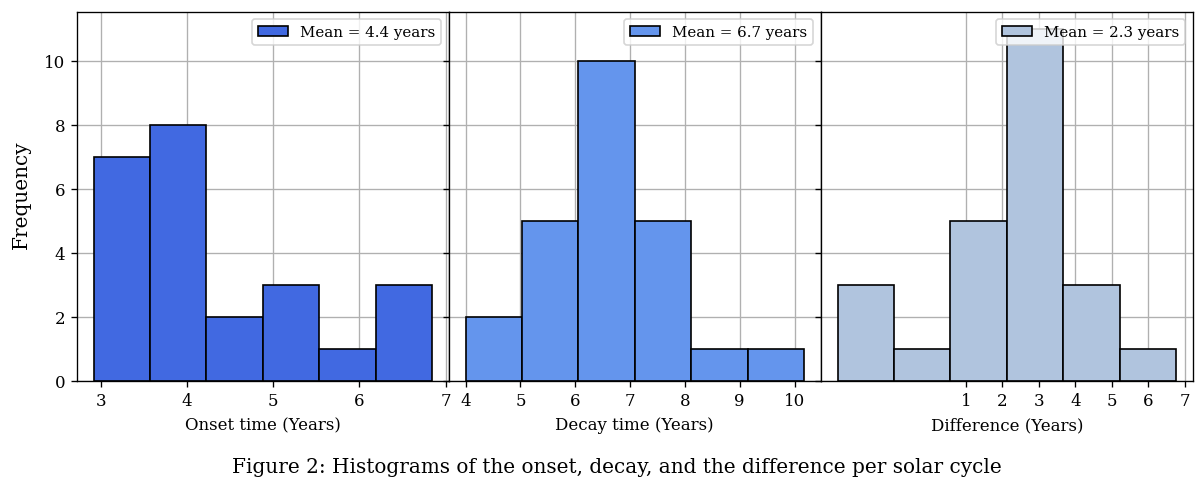

In [6]:
fig, (a0, a1, a2) = plt.subplots(
    1, 3, 
    figsize=(12, 4), 
    sharey=True,
    dpi=120
)

# Sturge's rule
nBins = 1 + int(np.ceil(np.log2(len(SolarCycles1to24))))

# Plotting
a0.hist(SolarCycles1to24['Onset time (Years)'], bins=nBins, edgecolor='black', color='royalblue', label=f"Mean = {round(SolarCycles1to24['Onset time (Years)'].mean(), 1)} years")
a1.hist(SolarCycles1to24['Decay time (Years)'], bins=nBins, edgecolor='black', color='cornflowerblue', label=f"Mean = {round(SolarCycles1to24['Decay time (Years)'].mean(), 1)} years")
a2.hist(SolarCycles1to24['Onset-Decay Difference (Years)'], bins=nBins, edgecolor='black', color='lightsteelblue', label=f"Mean = {round(SolarCycles1to24['Onset-Decay Difference (Years)'].mean(), 1)} years")

# Labelling
fig.supylabel("Frequency", x=0.08)
fig.suptitle("Figure 2: Histograms of the onset, decay, and the difference per solar cycle", y=-0.05)
a0.set_xlabel('Onset time (Years)')
a1.set_xlabel('Decay time (Years)')
a2.set_xlabel('Difference (Years)')
a2.set_xticks([1, 2, 3, 4, 5, 6, 7])
plt.subplots_adjust(wspace=0)
for figure in (a0, a1, a2):
    figure.grid()
    figure.set_axisbelow(True)
    figure.legend(loc='best', fontsize=9)

In [7]:
# If the ratio of large variance to second variance is less than 4, general rule of thumb says they have an equal variance.

Onset = SolarCycles1to24['Onset time (Years)']
Decay = SolarCycles1to24['Decay time (Years)']

print("Length of Onset:", len(Onset), "|", "Length of Decay:", len(Decay))

# Comparing the variances between Onset and decay time
if np.var(Decay) > np.var(Onset): varRatio = np.var(Decay) / np.var(Onset) 
else: varRatio = np.var(Onset) / np.var(Decay)

print(f"Ratio of variances: {varRatio:.2f}")

Length of Onset: 24 | Length of Decay: 24
Ratio of variances: 1.20


In [8]:
from scipy.stats import ttest_ind

ttest_ind(Onset, Decay, equal_var=True)

Ttest_indResult(statistic=-6.753883643183783, pvalue=2.1336789272291532e-08)

The null hypothesis states that the means of the onset time and the decay time are the same. 

Since the p-value is less than the significance value of 0.05, we can reject the null hypothesis and say with stastical significance that the onset and decay time are different.

In [9]:
df = SolarCycles1to24[
    [
    'Onset time (Years)', 
    'Decay time (Years)', 
    'Cycle length (Years)',
    ]
]

(3.5, 10.0)

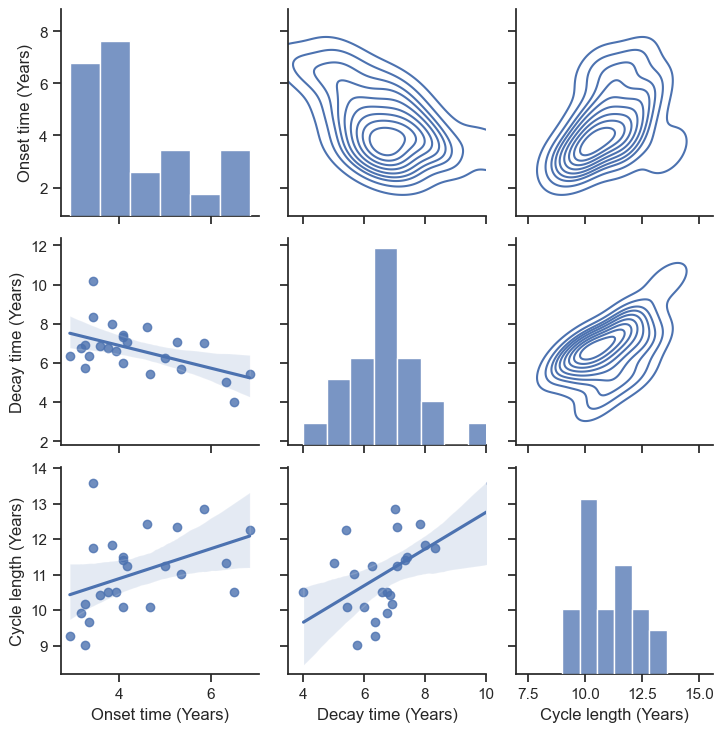

In [10]:
import seaborn as sns
sns.set_theme(style="ticks")
g = sns.PairGrid(df)
g.map_upper(sns.kdeplot)
g.map_diag(sns.histplot)
g.map_lower(sns.regplot)

g.axes[2,1].set_xlim(3.5, 10)